In [4]:
from sklearn import tree
from sklearn import svm
from sklearn import ensemble
from sklearn import neighbors
from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing

In [5]:
%matplotlib inline

from IPython.display import Image
import matplotlib as mlp
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import sklearn
import seaborn as sns

In [6]:
!pip install joypy

In [7]:
!pip install bubbly

In [8]:
!pip install plotly_express

Importing the libraries

In [7]:
import warnings
warnings.filterwarnings('ignore')

# for some basic operations
import numpy as np
import joypy

#for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import plotting
from pandas.plotting import parallel_coordinates

# for interactive visualizations
import plotly
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff

#for animated visualizations
from bubbly.bubbly import bubbleplot
import plotly_express as px

#for providing path
import os
print(os.listdir("../input"))

#for modelling
import sklearn
import imblearn

#for model explination
import shap
import eli5

FileNotFoundError: [WinError 3] The system cannot find the path specified: '../input'

In [8]:
#lets import the data
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')

In [9]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [10]:
#Lets take a look at the data
pd.set_option('display.max_columns', None)
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [12]:
#lets check shape of the dataset
df.shape

(1000, 40)

In [13]:
#lets get information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [14]:
#lets check the correlation
df.corr()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
months_as_customer,1.000000,0.922098,0.057555,0.026807,0.005018,0.015498,0.017895,0.006399,0.020209,0.070639,0.014736,-0.010162,0.058383,0.062108,0.065329,0.034940,0.061013,-0.000292,NaN
age,0.922098,1.000000,0.059413,0.029188,0.014404,0.018126,0.025604,-0.007075,0.007368,0.087161,0.022102,-0.015679,0.052359,0.069863,0.075522,0.060898,0.062588,0.001354,NaN
policy_number,0.057555,0.059413,1.000000,-0.006738,0.022566,0.008968,0.007083,0.009802,-0.005669,0.000113,0.013432,-0.004558,-0.012661,-0.018009,-0.008762,-0.010678,-0.020184,-0.000183,NaN
policy_deductable,0.026807,0.029188,-0.006738,1.000000,-0.003245,0.010870,0.004545,0.035212,-0.023544,0.060935,0.051214,-0.022765,0.066639,0.022839,0.039107,0.064792,0.005269,0.026105,NaN
policy_annual_premium,0.005018,0.014404,0.022566,-0.003245,1.000000,-0.006247,0.032354,-0.013738,0.023547,-0.001578,-0.045991,0.026780,0.002332,0.009094,-0.017633,-0.011654,0.020246,-0.049226,NaN
umbrella_limit,0.015498,0.018126,0.008968,0.010870,-0.006247,1.000000,0.019671,-0.047268,-0.024056,-0.023257,-0.021270,0.022743,-0.006738,-0.040344,-0.045412,-0.023790,-0.038584,0.009893,NaN
insured_zip,0.017895,0.025604,0.007083,0.004545,0.032354,0.019671,1.000000,0.006303,0.049372,0.008274,0.027448,0.028695,0.019805,-0.033873,-0.017495,-0.006841,-0.041083,-0.032736,NaN
capital-gains,0.006399,-0.007075,0.009802,0.035212,-0.013738,-0.047268,0.006303,1.000000,-0.046904,-0.016406,0.061643,0.055829,-0.017651,0.015980,0.025934,-0.000779,0.015836,0.031398,NaN
capital-loss,0.020209,0.007368,-0.005669,-0.023544,0.023547,-0.024056,0.049372,-0.046904,1.000000,-0.025054,-0.014895,-0.024418,-0.041330,-0.036060,-0.046060,-0.022863,-0.032665,-0.056615,NaN
incident_hour_of_the_day,0.070639,0.087161,0.000113,0.060935,-0.001578,-0.023257,0.008274,-0.016406,-0.025054,1.000000,0.120794,-0.034563,0.006527,0.217702,0.165768,0.179536,0.215626,0.021368,NaN


In [15]:
#lets check covarience
df.cov()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
months_as_customer,1.325104e+04,970.201810,1.703130e+06,1.888144e+03,1.410315e+02,4.098745e+06,1.476998e+05,2.053193e+04,6.537987e+04,56.525149,1.728322,-0.959327,7.468871,1.887564e+05,3.670575e+04,1.940521e+04,1.326454e+05,-0.202464,NaN
age,9.702018e+02,83.544841,1.395997e+05,1.632352e+02,3.214568e+01,3.806326e+05,1.678029e+04,-1.802445e+03,1.892620e+03,5.538026,0.205834,-0.117534,0.531856,1.685908e+04,3.369297e+03,2.685543e+03,1.080424e+04,0.074430,NaN
policy_number,1.703130e+06,139599.665361,6.608139e+10,-1.059731e+06,1.416366e+06,5.296036e+09,1.305565e+08,7.023384e+07,-4.095652e+07,201.322010,3518.009337,-961.035852,-3617.161738,-1.222275e+08,-1.099333e+07,-1.324355e+07,-9.799063e+07,-282.988733,NaN
policy_deductable,1.888144e+03,163.235235,-1.059731e+06,3.743784e+05,-4.848613e+02,1.527928e+07,1.993895e+05,6.005009e+05,-4.048617e+05,259.175175,31.927928,-11.423423,45.313313,3.689501e+05,1.167917e+05,1.912697e+05,6.088869e+04,96.088088,NaN
policy_annual_premium,1.410315e+02,32.145675,1.416366e+06,-4.848613e+02,5.961772e+04,-3.504155e+06,5.664307e+05,-9.349637e+04,1.615803e+05,-2.678940,-11.441581,5.362622,0.632688,5.862176e+04,-2.101409e+04,-1.372875e+04,9.336460e+04,-72.306760,NaN
umbrella_limit,4.098745e+06,380632.632633,5.296036e+09,1.527928e+07,-3.504155e+06,5.278077e+12,3.240420e+09,-3.026763e+09,-1.553189e+09,-371415.415415,-49788.788789,42850.850851,-17204.204204,-2.447073e+09,-5.092246e+08,-2.637003e+08,-1.674148e+09,136733.733734,NaN
insured_zip,1.476998e+05,16780.292669,1.305565e+08,1.993895e+05,5.664307e+05,3.240420e+09,5.141121e+09,1.259612e+07,9.948976e+07,4124.025754,2005.227796,1687.420324,1578.175520,-6.412337e+07,-6.122698e+06,-2.366451e+06,-5.563422e+07,-14120.443708,NaN
capital-gains,2.053193e+04,-1802.445245,7.023384e+07,6.005009e+05,-9.349637e+04,-3.026763e+09,1.259612e+07,7.768588e+08,-3.674132e+07,-3178.586987,1750.552653,1276.184985,-546.757457,1.175952e+07,3.528093e+06,-1.047625e+05,8.336193e+06,5264.676376,NaN
capital-loss,6.537987e+04,1892.620220,-4.095652e+07,-4.048617e+05,1.615803e+05,-1.553189e+09,9.948976e+07,-3.674132e+07,7.898403e+08,-4894.551752,-426.512212,-562.812412,-1290.858959,-2.675643e+07,-6.318256e+06,-3.100158e+06,-1.733802e+07,-9571.920821,NaN
incident_hour_of_the_day,5.652515e+01,5.538026,2.013220e+02,2.591752e+02,-2.678940e+00,-3.714154e+05,4.124026e+03,-3.178587e+03,-4.894552e+03,48.321586,0.855540,-0.197045,0.050422,3.995424e+04,5.624392e+03,6.021358e+03,2.830849e+04,0.893562,NaN


Data cleaning

In [16]:
#lets check whether the data has any null values or not:

#but there are in dataset which we have to remove by NAN values
df = df.replace('?', np.NAN)

df.isnull().any()

months_as_customer             False
age                            False
policy_number                  False
policy_bind_date               False
policy_state                   False
policy_csl                     False
policy_deductable              False
policy_annual_premium          False
umbrella_limit                 False
insured_zip                    False
insured_sex                    False
insured_education_level        False
insured_occupation             False
insured_hobbies                False
insured_relationship           False
capital-gains                  False
capital-loss                   False
incident_date                  False
incident_type                  False
collision_type                  True
incident_severity              False
authorities_contacted          False
incident_state                 False
incident_city                  False
incident_location              False
incident_hour_of_the_day       False
number_of_vehicles_involved    False
p

In [19]:
#missing values treatment using fillna

#we will raplace '?' by most common collission type as we are unware of the type
df['collision_type'].fillna(df['collision_type'].mode()[0], inplace = True)

#It may be case that there are no responses for property damage then we might take it as No property damage
df['property_damage'].fillna('NO', inplace = True)

#again, if there are no responses fpr police report available then we might take it as No report available
df['police_report_available'].fillna('No', inplace = True)

df.isnull().any().any()

True

Data Visualizations

Scatter plot between policy annual premium vs toatl claim amount 

In [21]:
#plotting a scatter plot

fig = px.scatter(df, x = 'total_claim_amount', y = 'policy_annual_premium', color = 'insured_sex',
                marginal_x = 'rug', marginal_y = 'histogram')

fig.show()

In [23]:
fig = px.scatter_matrix(df, dimensions=["injury_claim", "property_claim", "vehicle_claim"], color = "insured_sex")
fig.show()

In [25]:
fig = px.parallel_categories(df, color = 'total_claim_amount', color_continuous_scale=px.colors.sequential.Inferno)
fig.show()

In [30]:
fraud = df['fraud_reported'].value_counts()

label_fraud = fraud.index
size_fraud = fraud.values

colors = ['silver', 'gold']
trace = go.pie(labels = label_fraud, values = size_fraud, marker = dict(colors = colors), name = 'Frauds', hole = 0.3)

df = [trace]

layout = go.Layout(title = 'Distribution of Frauds')

fig = go.Figure(data = df, layout = layout)
py.iplot(fig)

TypeError: 'module' object is not callable

AttributeError: 'PolyCollection' object has no property 'aplha'

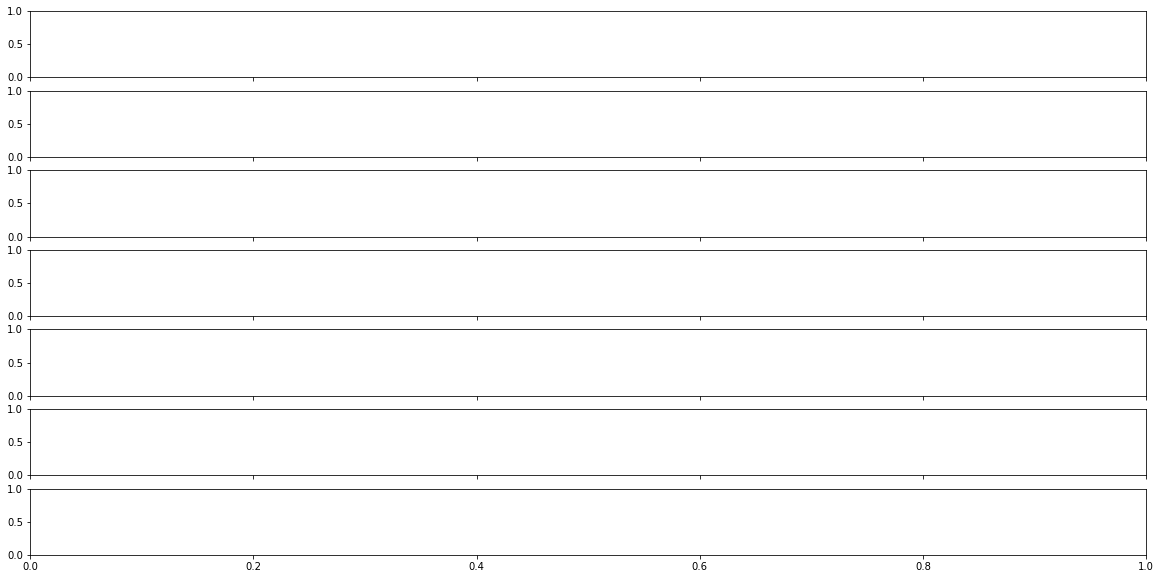

In [35]:
fig, axes = joypy.joyplot(df, column = ['incident_hour_of_the_day', 'number_of_vehicles_involved', 'witnesses'], 
                         by = 'incident_city',
                         ylim = 'own',
                         figsize = (20,10),
                         aplha = 0.5,
                         legend = True)

plt.title('Incident hour, No. of vehicles, witnesses vs Incident city', fontsize = 20)

plt.show()

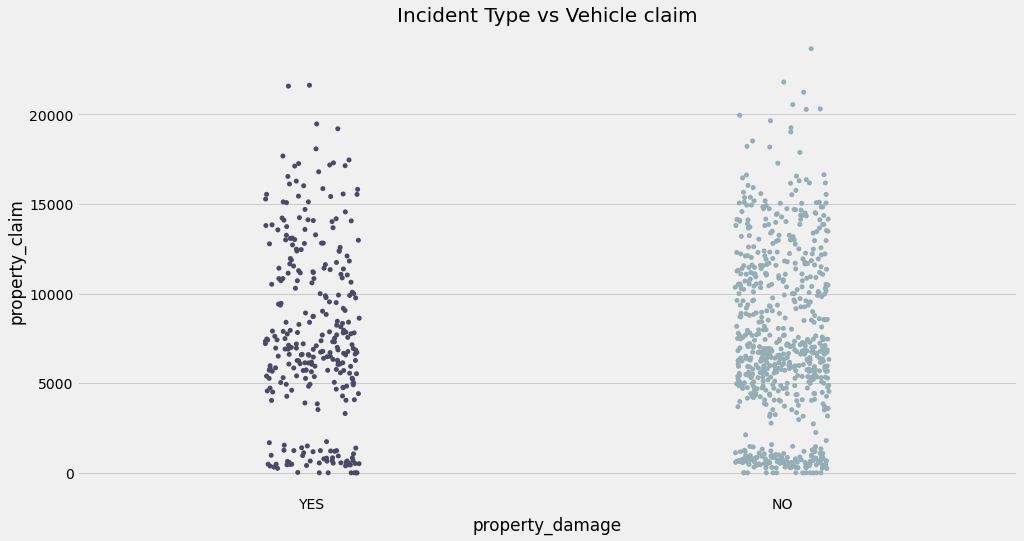

In [36]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15,8)

sns.stripplot(df['property_damage'], df['property_claim'], palette = 'bone')
plt.title('Incident Type vs Vehicle claim', fontsize = 20)
plt.show()

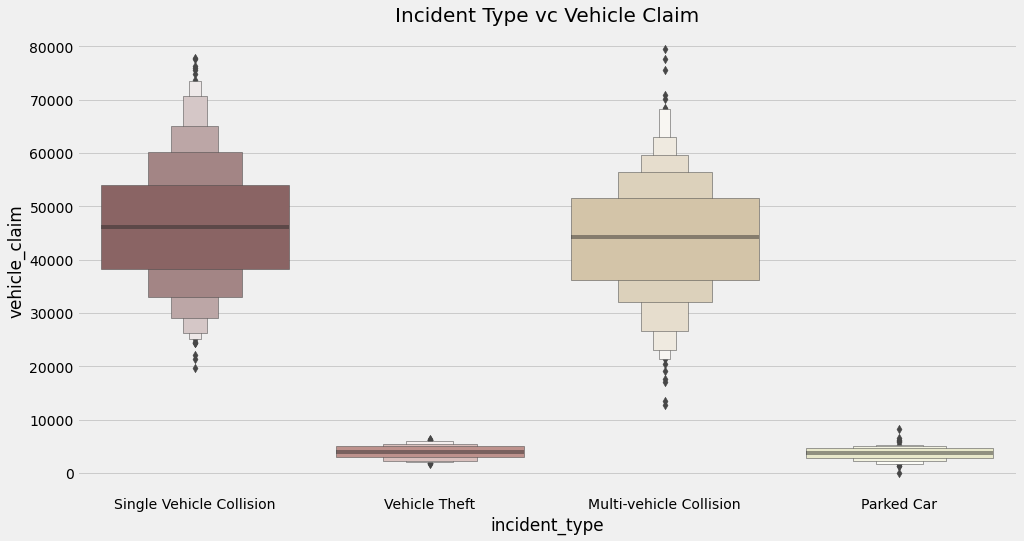

In [37]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15,8)

sns.boxenplot(df['incident_type'], df['vehicle_claim'], palette = 'pink')
plt.title('Incident Type vc Vehicle Claim', fontsize = 20)
plt.show()

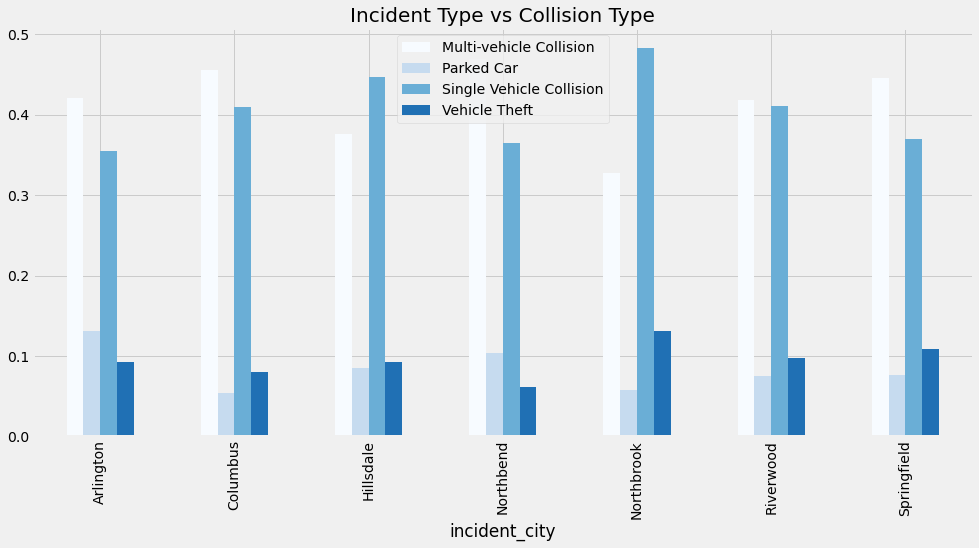

In [39]:
incident = pd.crosstab(df['incident_city'], df['incident_type'])
colors = plt.cm.Blues(np.linspace(0, 1, 5))
incident.div(incident.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = False, figsize = (15,7),
                                                          color = colors)

plt.title('Incident Type vs Collision Type', fontsize = 20)
plt.legend()
plt.show()

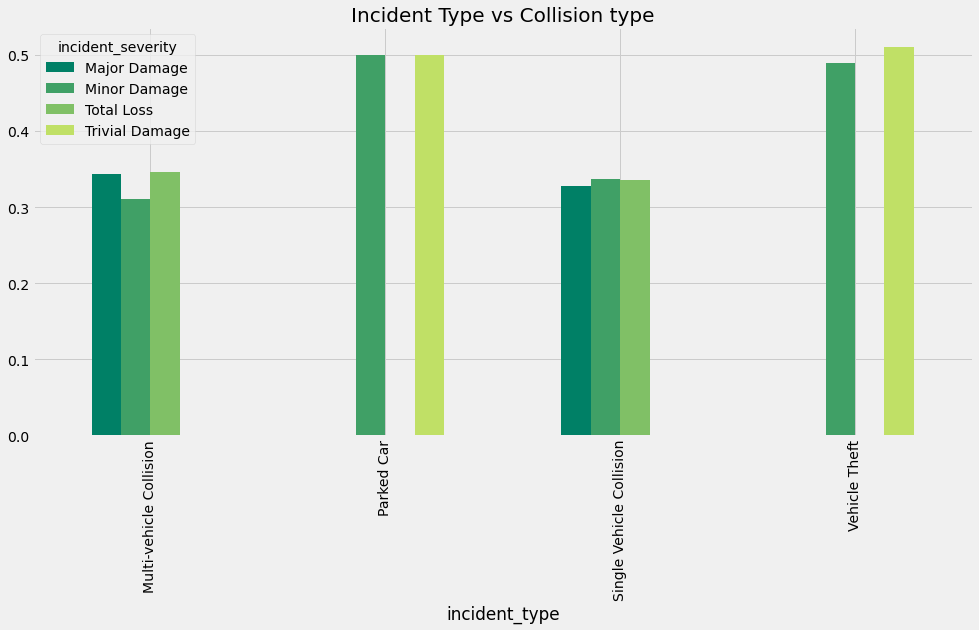

In [42]:
incident = pd.crosstab(df['incident_type'], df['incident_severity'])
colors = plt.cm.summer(np.linspace(0, 1, 5))
incident.div(incident.sum(1), axis = 0).plot(kind = 'bar', stacked = False,
                                                          figsize = (15,7), color = colors)

plt.title('Incident Type vs Collision type', fontsize = 20)
plt.show()

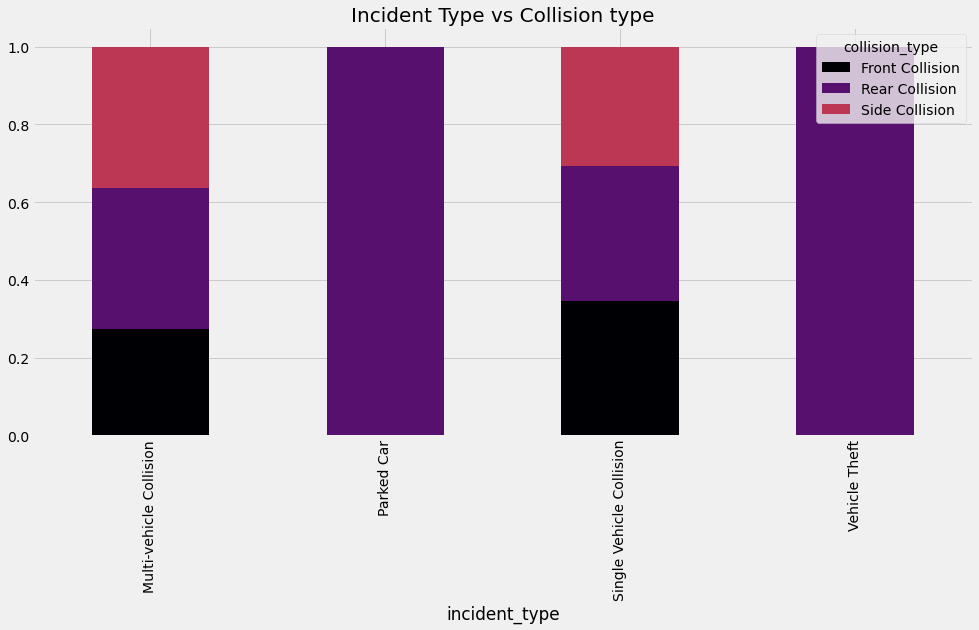

In [43]:
incident = pd.crosstab(df['incident_type'], df['collision_type'])
colors = plt.cm.inferno(np.linspace(0, 1, 5))
incident.div(incident.sum(1), axis = 0).plot(kind = 'bar', stacked = True,
                                                          figsize = (15,7), color = colors)

plt.title('Incident Type vs Collision type', fontsize = 20)
plt.show()

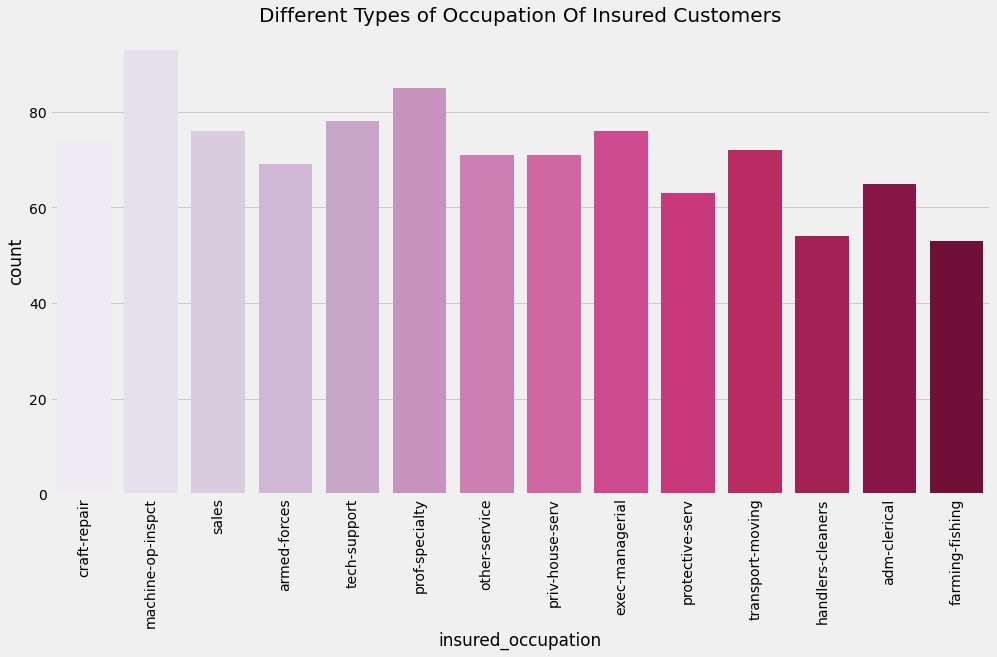

In [44]:
#lets check the insured hobbies

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15,8)

sns.countplot(df['insured_occupation'], palette = 'PuRd')
plt.title('Different Types of Occupation Of Insured Customers', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

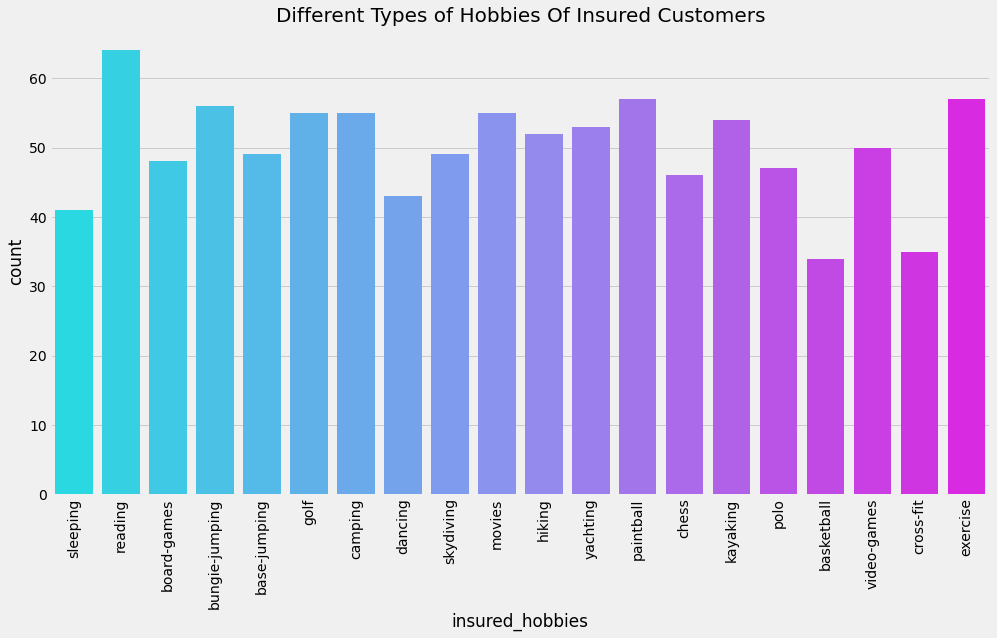

In [45]:
#lets check the insured hobbies

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15,8)

sns.countplot(df['insured_hobbies'], palette = 'cool')
plt.title('Different Types of Hobbies Of Insured Customers', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

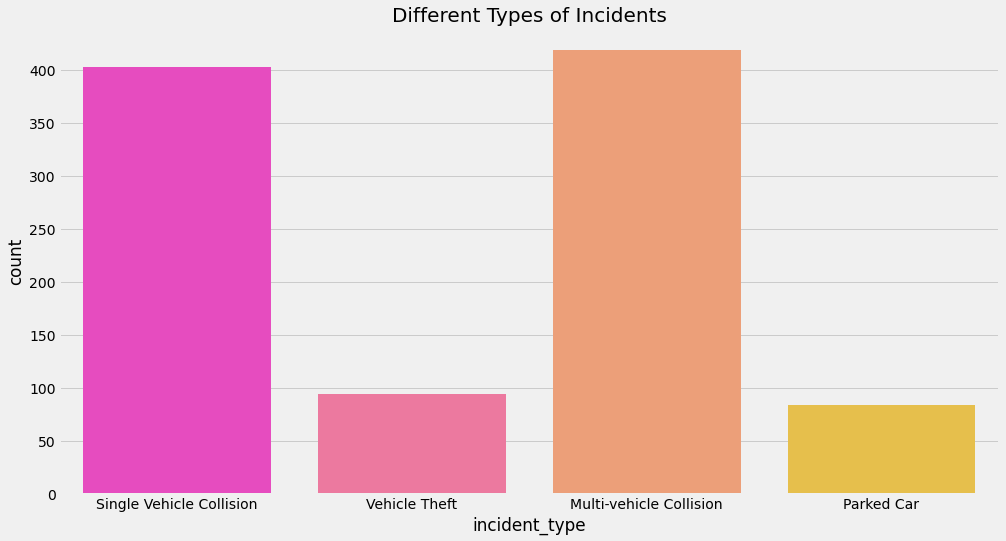

In [46]:
#lets check the insured hobbies

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15,8)

sns.countplot(df['incident_type'], palette = 'spring')
plt.title('Different Types of Incidents', fontsize = 20)
plt.show()

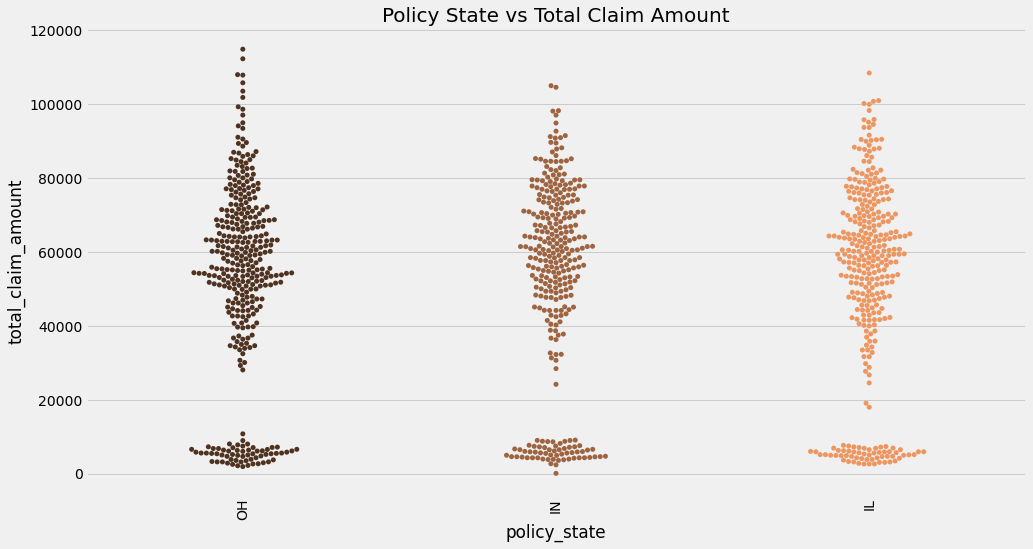

In [47]:
#swarm plot

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15,8)

sns.swarmplot(df['policy_state'], df['total_claim_amount'], palette = 'copper')
plt.title('Policy State vs Total Claim Amount', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

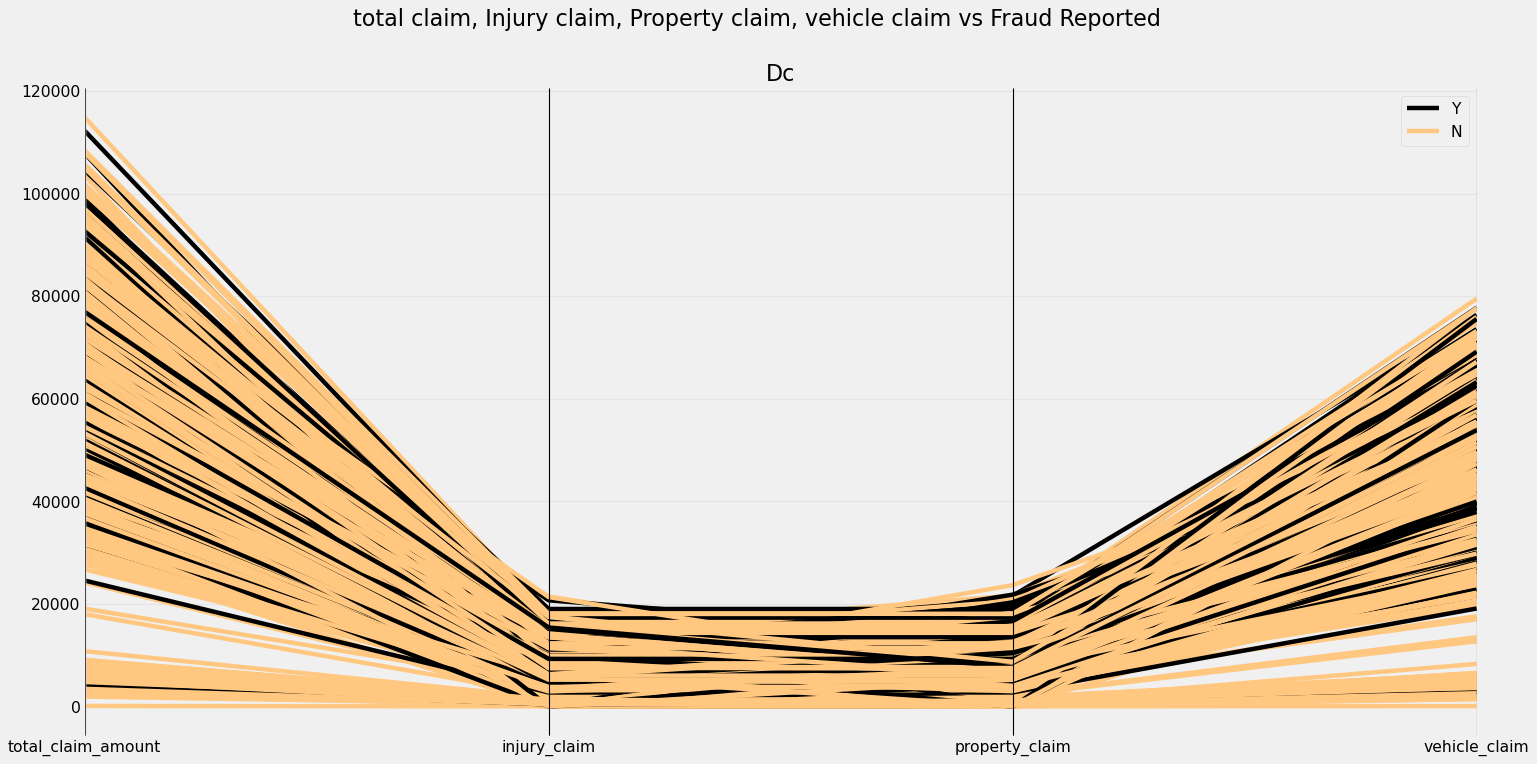

In [48]:
#plot

plt.figure(figsize=(20,10), dpi = 80)

parallel_coordinates(df[['total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'fraud_reported']], 
                    'fraud_reported', colormap = 'copper')

#Lighten Borders
plt.gca().spines["top"].set_alpha(0)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(0)
plt.gca().spines["left"].set_alpha(.3)

plt.title('Dc', fontsize = 20)
plt.grid(alpha=0.3)

plt.suptitle('total claim, Injury claim, Property claim, vehicle claim vs Fraud Reported', fontsize = 20)
plt.show()

In [51]:
import warnings
warnings.filterwarnings('ignore')

figure = bubbleplot(dataset = df, x_column = 'policy_annual_premium', y_column = 'total_claim_amount',
                   bubble_column = 'insured_sex', time_column = 'auto_year', size_column = 'months_as_customer',
                   color_column = 'insured_sex', x_title = "Annual Policy Premium", y_title = "Total Claim Amount", 
                   title = 'Annual Premium vs Total Claim Amount Vs Month as Customer',
                   x_logscale = False, scale_bubble = 3, height = 650)

py.iplot(figure, config={'scrollzoom' : True })

In [60]:
trace = go.Histogram(
           x = df['insured_education_level'],
           name = 'Marvel',
           opacity = 0.75,
        marker = dict(color = 'rgb(195, 195, 145, 0.5)'
             )
)

df = [trace]

layout = go.Layout(
title = 'Education Level of the Customers')

fig = go.Figure(df = df, layout = layout)
py.iplot(fig)

SyntaxError: invalid syntax (<ipython-input-60-474847132709>, line 2)

In [ ]:
trace = go.Histogram(
           x = df['insured_occupation'],
           name = 'Marvel',
           opacity = 0.75,
        marker = dict(color = 'rgb(15, 255, 185, 0.5)'
             )
)

df = [trace]

layout = go.Layout(
title = 'Occupation of the Customers')

fig = go.Figure(df = df, layout = layout)
py.iplot(fig)

In [61]:
sex = df['insured_sex'].value_counts()
rel = df['insured _relationship'].value_counts()

label_sex = sex.index
size_sex = sex.values

label_rel = rel.index
size_rel = rel.values

colors = ['aqua', 'gold']
trace = go.pie(labels = label_sex, values = size_sex, marker = dict(colors = colors), name = 'Gender', hole = 0.3)

colors2 = ['pink', 'lightblue', 'lightgreen', 'grey', 'red']
trace2 = go.pie(labels = label_rel, values = size_rel, marker = dict(colors=colors2), name = 'Relationship', hole = 0.3)

df = [trace]
df2 = [trace2]

layout1 = go.Layout(title = 'Gender of the Customers')
layout2 = gp.Layout(title = 'Relationship')

fig = go.Figure(df = df, layout = layout1)
fig2 = go.Figure(df = df2, layout = layout2)
py.iplot(fig)
py.iplot(fig2)
            

TypeError: list indices must be integers or slices, not str

In [ ]:
trace = go.Violin(
      x = df['insured_sex'],
      y = df['insured_zip'],
      name = 'Gender vs Insured Zip',
      opacity = 0.75,
      marker = dict(color = 'rgb(215, 5, 185, 0.5)'
                   )
)

df = [trace]

layout = go.layout(title = 'Gender vs Insured zip')

fig = go.Figure(df=df, layout = layout)
py.iplot(fig)

Data processing

In [64]:
#lets extract days, month and year from policy bind date
df['Policy_bind_date'] = pd.to_datetime(df['policy_bind_date'], errors = 'coerce')

TypeError: list indices must be integers or slices, not str

In [65]:
#lets encode the fraud report to numerical values

df['fraud_reported'] = df['fraud_reported'].replace(('Y', 'N'), (0,1))

#checking the values of fraud reported
# data['fraud_reported'].value_counts()

TypeError: list indices must be integers or slices, not str

In [67]:
df[['auto_model', 'fraud_reported']].groupby(['auto_model'],
                                            as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

TypeError: list indices must be integers or slices, not list

In [68]:
df = df.drop(['policy_number', 'policy_bind_date', 'incident_date', 'incident_location', 'auto_model'], axis = 1)

df.columns

AttributeError: 'list' object has no attribute 'drop'

In [10]:
#lets split the data into dependent and independent sets

x = df.drop(['fraud_reported'], axie = 1)
Y = df['fraud_reported']

print("Shape of x :", x.shape)
print("Shape of y :", y.shape)

NameError: name 'df' is not defined

In [11]:
#lets split the data into train and test sets

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

print("shape of x_train :", x_train.shape)
print("shape of x_test :", x_test.shape)
print("shape of y_train :", y_train.shape)
print("shape of y_test :", y_test.shape)


NameError: name 'x' is not defined

In [ ]:
plt.rcparams['figure.figsize'] = (15,10)
sns,heatmap(x_train, corr(), cmap = 'copper')
plt.title('Heat Map for correlations', fontsize = 20)
plt.show()

Modelling with Ensemble of samplers

Random Forest Classifier

In [ ]:
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

model = BalancedRandomForestClassifier(n_estimators = 100, random_state = 0)

model.fit(x_train, y_train)
y_pred_rf = model.predict(x_test)

print("Training Accuracy: ", model.score(x_train, y_train))
print('Testing Accuracy: ', mosel.score(x_test, y_test))

#making a classification report 
cr = classification_report(y_test, y_pred_rf)
print(cr)

#making a confusion matrix
plt.rcParams['Figure.figsize'] = (5,5)
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot = True, cmap = 'spring')
plt.show()

In [ ]:
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

model1 = EasyEnsembleClassifier(n_estimators = 100, random_state = 0)

model1.fit(x_train, y_train)
y_pred_ef = model1.predict(x_test)

print("Training Accuracy: ", model1.score(x_train, y_train))
print('Testing Accuracy: ', model1.score(x_test, y_test))

#making a classification report 
cr = classification_report(y_test, y_pred_ef)
print(cr)

#making a confusion matrix

cm = confusion_matrix(y_test, y_pred_ef)
sns.heatmap(cm, annot = True, cmap = 'copper')
plt.show()

In [ ]:
#boosting

y_pred = y_pred_rf*0.5 + y_pred_ef*0.2 + y_pred_bc*0.3

y_pred[y_pred > 0.5] = 1
y_pred[y_pred <= 0.5] = 0

#making a classification report
cr = classification_report(y_test, y_pred)
print(cr)

#making a confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, cmap = 'Reds')
plt.show()

Applying sampling techniques

Under Sampling

In [ ]:
y.value_counts()

In [ ]:
frauds = np.array(df[df['fraud_reported']==0].index)
no_frauds = len(frauds)

print(no_frauds)

In [ ]:
normal_indices = df[df['fraud_reported']==1]
no_normal_indices = len(normal_indices)

print(no_normal_indices)

In [ ]:
from pdpbox import pdp, info_plots #for partial plots

base_features = x_train.columns.values.tolist()

feat_name = 'age'
pdp.dist = pdp.pdp_isolate(model=model, dataset=x_test, model_features = base_features, feature = feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

In [ ]:
#lets see tha shap values

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_test)

shap.summary_plot(shap_values[1], x_test, plot_type='bar')

In [ ]:
shap.summary_plot(shap_values[1], x_test)

In [ ]:
#lets do some real time predictions

fraud = x_test.iloc[1,:].astype(float)
fraud_analysis(fraud, model)

In [ ]:
fraud = x_test.iloc[2,:].astype(float)
fraud_analysis(fraud, model)

In [ ]:
fraud = x_test.iloc[3,:].astype(float)
fraud_analysis(fraud, model)

In [ ]:
fraud = x_test.iloc[4,:].astype(float)
fraud_analysis(fraud, model)

In [ ]:
fraud = x_test.iloc[5,:].astype(float)
fraud_analysis(fraud, model)

In [ ]:
shap_values = explainer.shap_values(x_train.iloc[:50])
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], x_test.iloc[:50])